# **IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, OPTICS, Birch
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from scipy.stats import zscore
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
# Load data
df = pd.read_csv("/content/Warehouse_and_Retail_Sales.csv")


In [ ]:
df.head(20)


,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0
5,2020,1,KYSELA PERE ET FILS LTD,100641,CORTENOVA VENETO P/GRIG - 750ML,WINE,2.76,0.0,6.0
6,2020,1,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.08,1.0,1.0
7,2020,1,BROWN-FORMAN BEVERAGES WORLDWIDE,1008,JACK DANIELS COUNTRY COCKTAIL SOUTHERN PEACH -...,BEER,0.00,0.0,2.0
8,2020,1,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,6.41,4.0,0.0
9,2020,1,INTERNATIONAL CELLARS LLC,101117,KSARA CAB - 750ML,WINE,0.33,1.0,2.0


In [ ]:
df.describe()


,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307645.000000,307645.000000,307642.000000,307645.000000,307645.000000
mean,2018.438525,6.423862,7.024071,6.936465,25.294597
std,1.083061,3.461812,30.986238,30.237195,249.916798
min,2017.000000,1.000000,-6.490000,-38.490000,-7800.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.267500,3.000000,5.000000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [ ]:
df.isnull().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,167
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,1
RETAIL SALES,3
RETAIL TRANSFERS,0
WAREHOUSE SALES,0


# **Data preprocessing**

In [ ]:
# Fill missing values
for col in ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']:
    df[col].fillna(df[col].median(), inplace=True)


<ipython-input-7-7f0eb36be8ec>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [ ]:
# Remove outliers using IQR
for col in ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]


# **EXPLORATORY DATA ANALYSIS**

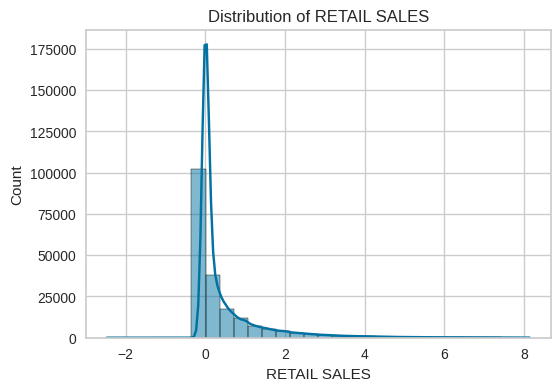

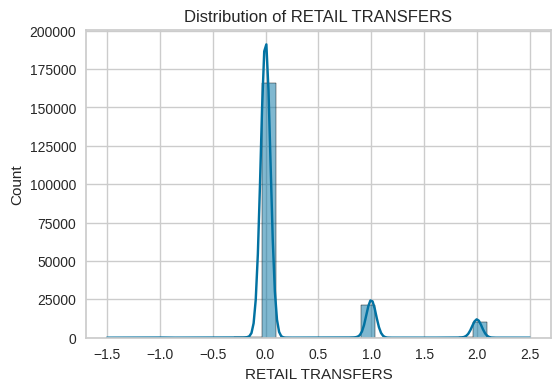

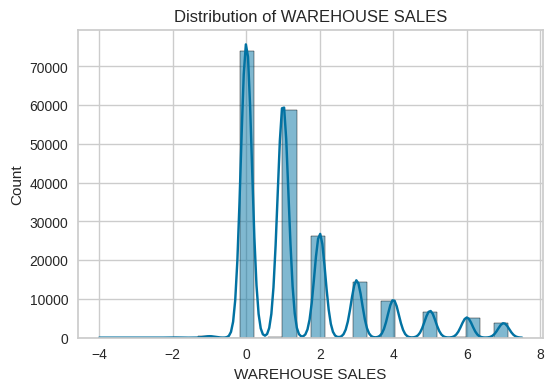

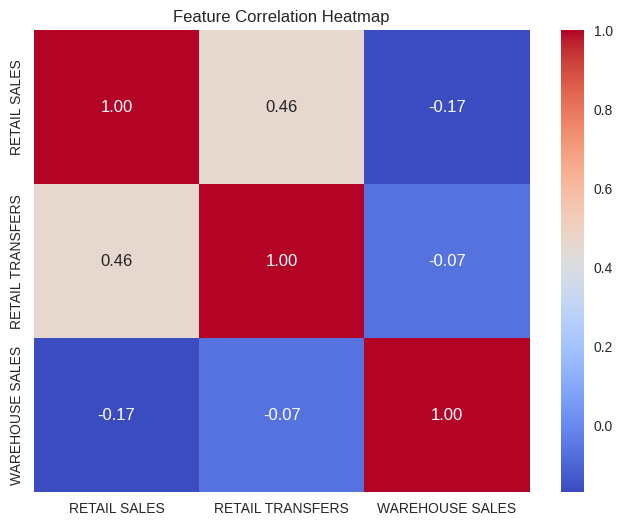

In [ ]:
# Distribution of numerical features
numerical_cols = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


# **FEATURE ENGINEERING**

In [ ]:
# Feature Engineering: Aggregate sales by ITEM CODE
features = df.groupby('ITEM CODE')[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].sum()

# New Features: Sales Ratios
features['Retail_to_Warehouse_Ratio'] = features['RETAIL SALES'] / (features['WAREHOUSE SALES'] + 1)
features['Retail_Transfer_Ratio'] = features['RETAIL TRANSFERS'] / (features['RETAIL SALES'] + 1)
features['Total_Sales'] = features.sum(axis=1)

# Add moving average sales as a new feature
features['Moving_Avg_Sales'] = features['Total_Sales'].rolling(window=3, min_periods=1).mean()

In [ ]:
# Feature Engineering: Aggregate sales by ITEM CODE
features = df.groupby('ITEM CODE')[numerical_cols].sum()

# New Features: Sales Ratios
# Add a small value to the denominator to avoid division by zero
features['Retail_to_Warehouse_Ratio'] = features['RETAIL SALES'] / (features['WAREHOUSE SALES'] + 1e-8)
features['Retail_Transfer_Ratio'] = features['RETAIL TRANSFERS'] / (features['RETAIL SALES'] + 1e-8)
features['Total_Sales'] = features.sum(axis=1)

# Replace infinite values with NaN
features.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values if necessary
# You can use features.fillna(features.mean(), inplace=True) or another imputation strategy
features.fillna(features.mean(), inplace=True)

# Standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# **INTERPRETATION OF FEATURE ENGINEERING**
1)# **Aggregating Sales**

This groups the dataset by ITEM CODE and sums the sales-related columns.

Helps analyze total sales per item rather than per transaction.

Reduces data size and removes unnecessary transaction-level granularity.

2)# **Sales Ratio**

Retail to Warehouse Ratio:

Measures how much of an item's sales come from retail compared to warehouse sales.

A higher ratio means more direct retail sales, whereas a lower ratio suggests warehouse sales dominate.

Retail Transfer Ratio:

Measures how much of the retail sales are transferred rather than sold directly.

Helps identify items frequently moving between locations before being sold.



3)# **Total Sales Calculation**

Captures the overall demand for each item by summing all types of sales.

A key indicator of an item's popularity.


4)# **Moving Average Sales**

Accounts for sales trends over time by computing a moving average with a window of 3.

Helps smooth out fluctuations and detect consistent demand patterns.

Reduces noise in sales data by considering recent sales behavior.

In [ ]:
# Standardization
from sklearn.model_selection import GridSearchCV # Import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score # Import make_scorer and silhouette_score

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Hyperparameter tuning for KMeans
param_grid = {"n_clusters": range(3, 10)}
kmeans = KMeans(random_state=42, n_init=10)

# Create a scorer object using make_scorer
silhouette_scorer = make_scorer(silhouette_score)

grid_search = GridSearchCV(kmeans, param_grid, scoring=silhouette_scorer, cv=3)  # Use the scorer object
grid_search.fit(scaled_features)
best_k = grid_search.best_params_["n_clusters"]

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^

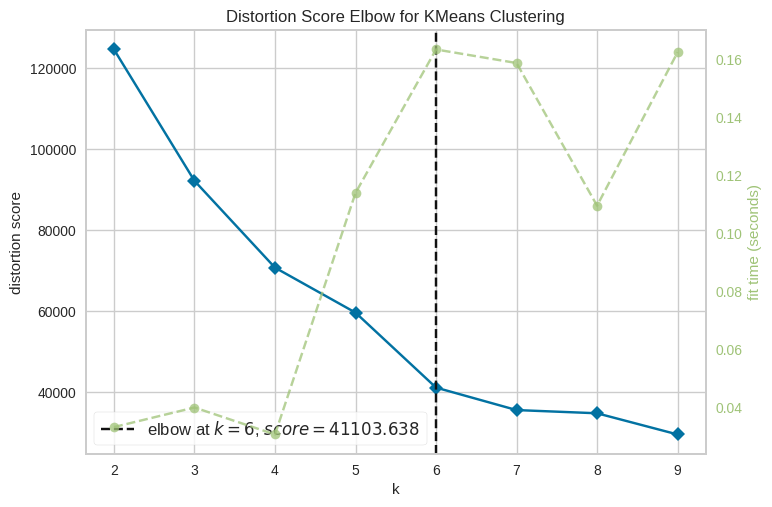

In [ ]:
# Determine optimal clusters using Elbow method
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(scaled_features) # Changed X_scaled to scaled_features
visualizer.show()
optimal_k = visualizer.elbow_value_

# **ELBOW K-MEANS**

Elbow at k = 6 (Optimal Number of Clusters)


**1)The distortion score decreases rapidly until k=6**, then the rate of decrease slows down.

This suggests that after k=6, additional clusters do not provide significant improvement in compactness.


2)**Distortion Score Behavior**


A steep decline from k=2 to k=6 shows that increasing clusters improves clustering quality.

After k=6, the curve flattens, meaning adding more clusters does not significantly reduce intra-cluster variance.
Fit Time (Green Line) Consideration
  

3)**Computation time increases as k increases**, peaking around k=6.

This indicates that k=6 may be a practical choice since higher k values provide diminishing returns while increasing computational cost.

# **MODEL TRAINING**

In [ ]:
# Model Training
models = {
    'KMeans': KMeans(n_clusters=optimal_k, random_state=42),
    'GMM': GaussianMixture(n_components=optimal_k, random_state=42),
    'Agglomerative': AgglomerativeClustering(n_clusters=optimal_k),
    'DBSCAN': DBSCAN(eps=1.5, min_samples=5),
    'OPTICS': OPTICS(min_samples=5),
    'Birch': Birch(n_clusters=optimal_k)
}


In [ ]:
# Applying models and storing results
results = {}
for name, model in models.items():
    # Get cluster labels for each unique ITEM CODE
    clusters = model.fit_predict(scaled_features)

    # Create a temporary DataFrame to store cluster assignments
    cluster_df = pd.DataFrame({'ITEM CODE': features.index, f'{name}_Cluster': clusters})

    # Merge cluster assignments back into the original DataFrame
    df = pd.merge(df, cluster_df, on='ITEM CODE', how='left')

    results[name] = clusters

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_optics.py:1086: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


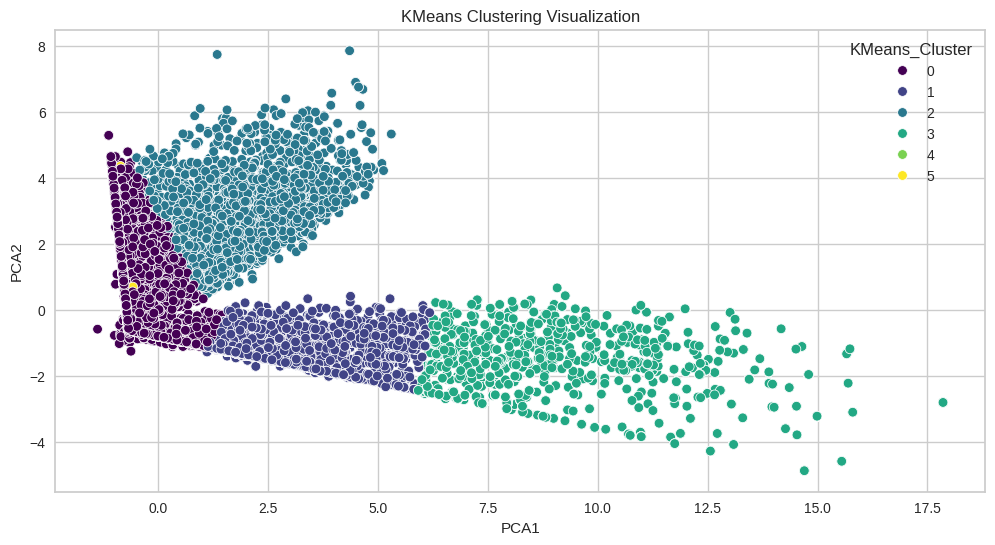

In [ ]:
# PCA for visualization
pca = PCA(n_components=2)
# Replace X_scaled with scaled_features
X_pca = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA results with 'ITEM CODE' as index
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'], index=features.index)

# Merge PCA results back into the original DataFrame using 'ITEM CODE'
df = pd.merge(df, pca_df, on='ITEM CODE', how='left')

# Visualization
plt.figure(figsize=(12,6))
sns.scatterplot(x='PCA1', y='PCA2', hue=df['KMeans_Cluster'], palette='viridis', data=df)
plt.title('KMeans Clustering Visualization')
plt.show()

# **INTERPRETATION**

**Cluster 0 (Dark Purple - Bottom Left)**


Represents low sales and low transfer products.

These could be slow-moving products or those with stable but low demand.

The density suggests many products belong to this category.


**Cluster 1 (Blue - Middle Left to Upper Right)**

Represents products with moderate-to-high sales.

These products might be seasonal or location-dependent.

The spread of points suggests variability in demand.


**Cluster 2 (Teal - Top Right)**

Represents products with high sales and high retail transfers.

Could be fast-moving products or those needing frequent stock adjustments.

Indicates high consumer demand with significant inventory movement.


**Cluster 3 (Green - Middle Right)**

Represents products with steady but slightly fluctuating sales.

Possibly mid-range products in terms of sales volume.

**Cluster 4 (Light Green - Rightmost**)


Represents products with high warehouse sales but possibly lower retail sales.

Could be bulk warehouse products or wholesale-driven items.

**Cluster 5 (Yellow - Single Point)**


Likely represents an outlier.

Could be a rare product, a special promotion, or an error in the data.

In [ ]:
# Model Evaluation
def evaluate_clustering(X, labels):
    metrics = {}
    if len(set(labels)) > 1:  # Avoid computing for single cluster
        metrics['Silhouette Score'] = silhouette_score(X, labels)
        metrics['Calinski-Harabasz Score'] = calinski_harabasz_score(X, labels)
        metrics['Davies-Bouldin Score'] = davies_bouldin_score(X, labels)
    return metrics

# **INTERPREATION  THE MEASURES**

**Silhouette Score**: Measures how similar an object is to its own cluster compared to other clusters. Higher values indicate better-defined clusters.

**Calinski-Harabasz Score**: Also known as the Variance Ratio Criterion, measures the ratio of between-cluster variance to within-cluster variance. Higher values indicate better-defined clusters.

**Davies-Bouldin Score**: Measures the average similarity ratio of each cluster with its most similar cluster. Lower values indicate better clustering.

In [ ]:
!pip install yellowbrick

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer

# Assuming 'scaled_features' is your standardized data

# Model Evaluation
def evaluate_clustering(X, labels):
    metrics = {}
    if len(set(labels)) > 1:  # Avoid computing for single cluster
        metrics['Silhouette Score'] = silhouette_score(X, labels)
        metrics['Calinski-Harabasz Score'] = calinski_harabasz_score(X, labels)
        metrics['Davies-Bouldin Score'] = davies_bouldin_score(X, labels)
    return metrics



In [ ]:
from IPython.display import display
import pandas as pd

# Assuming 'results' and 'evaluate_clustering' are defined from previous cells

# Initialize an empty list to store evaluation results
evaluation_results = []

# Iterate through clustering results and calculate evaluation metrics
for name, clusters in results.items():
    scores = evaluate_clustering(scaled_features, clusters)
    scores['Model'] = name  # Add the model name to the scores dictionary
    evaluation_results.append(scores)  # Append the scores to the list

# Create a DataFrame from the evaluation results
evaluation_df = pd.DataFrame(evaluation_results)

# Display the table using display()
display(evaluation_df)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score,Model
0,0.682187,15093.347361,0.607579,KMeans
1,0.292693,4966.830579,1.347039,GMM
2,0.654231,17239.714347,0.683723,Agglomerative
3,0.667800,715.930215,1.710842,DBSCAN
4,0.621686,64.145959,1.343805,OPTICS
5,0.702409,7410.423515,0.440370,Birch


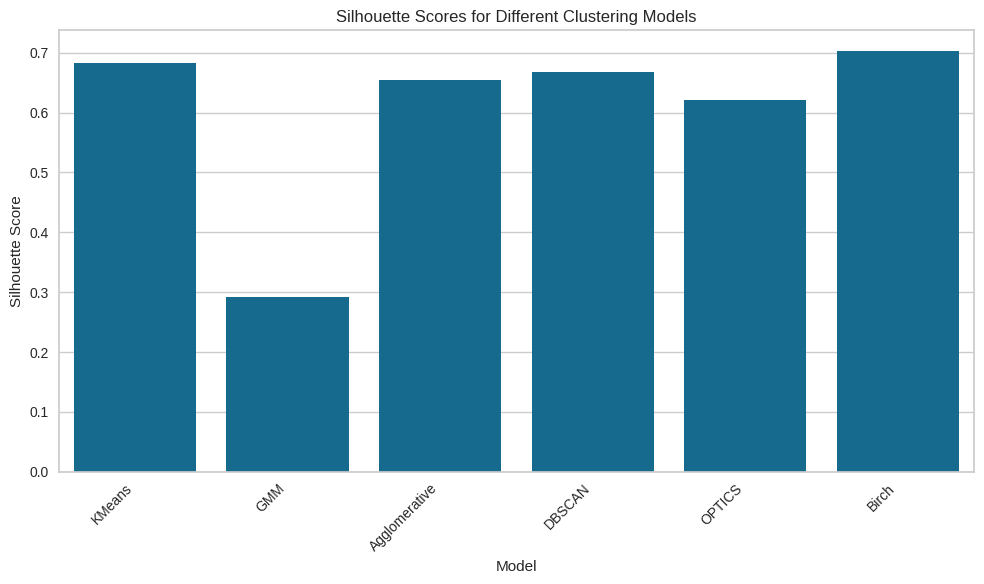

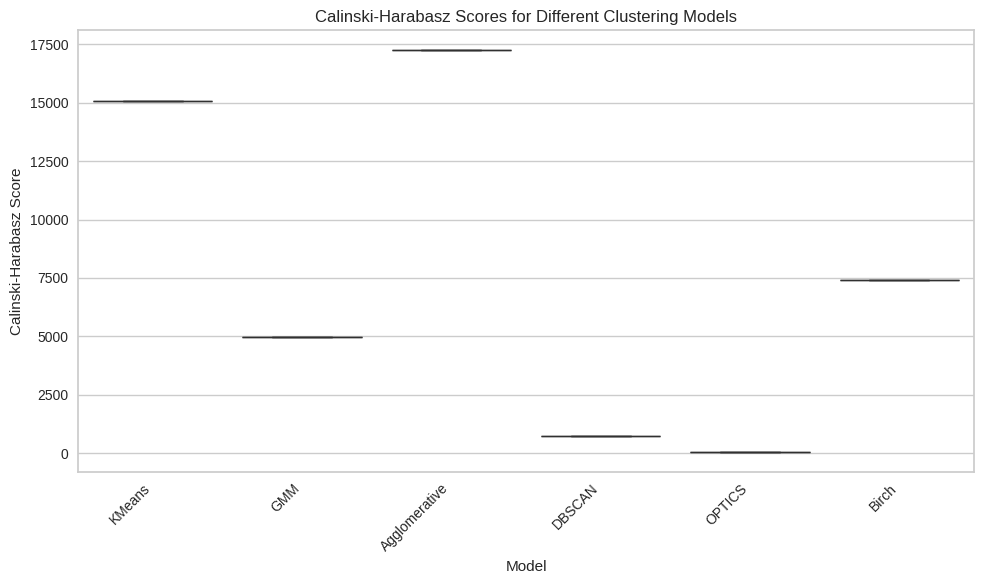

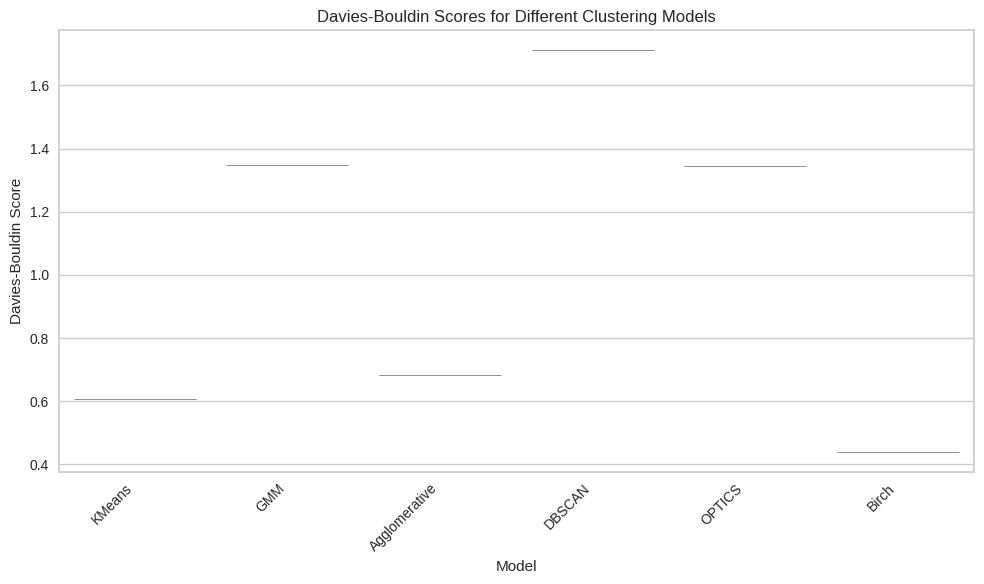

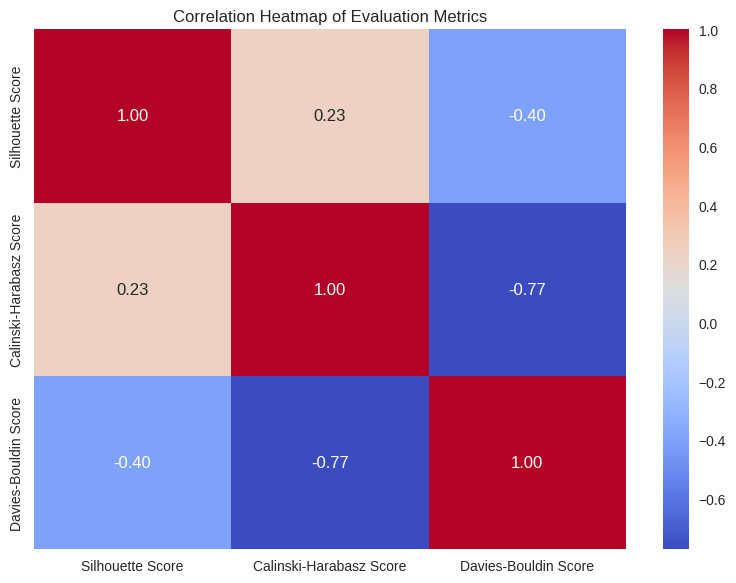

In [ ]:
# 1. Bar Plot of Silhouette Scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Silhouette Score', data=evaluation_df)
plt.title('Silhouette Scores for Different Clustering Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Box Plot of Calinski-Harabasz Scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Calinski-Harabasz Score', data=evaluation_df)
plt.title('Calinski-Harabasz Scores for Different Clustering Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Distribution of Davies-Bouldin Scores
plt.figure(figsize=(10, 6))
sns.violinplot(x='Model', y='Davies-Bouldin Score', data=evaluation_df)
plt.title('Davies-Bouldin Scores for Different Clustering Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Correlation Heatmap (if multiple metrics are present)
if len(evaluation_df.columns) > 2:  # Check if there are multiple metrics
    plt.figure(figsize=(8, 6))
    sns.heatmap(evaluation_df.drop(columns=['Model']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Evaluation Metrics')
    plt.tight_layout()
    plt.show()

# **Interpretation**
1)**Birch** has the best silhouette score (0.702409)
and the lowest Davies-Bouldin Score (0.440370), indicating well-separated and compact clusters.


2)**Agglomerative Clustering** also performs well, with a high Calinski-Harabasz Score (17239.714347), meaning it finds well-defined clusters.

3)**KMeans** is also a strong performer, with a good silhouette score (0.682187) and a high Calinski-Harabasz Score (15093.347361).

4)**GMM and DBSCAN** struggle, showing lower silhouette scores and higher Davies-Bouldin Scores, indicating less distinct clustering.

5)**OPTICS** does not seem to be forming strong clusters based on the scores.

# **HYPERPARAMETER TUNING**

In [ ]:
# Hyperparameter tuning for KMeans and Birch
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, silhouette_score
# ... (rest of your code)

param_grid_birch = {'n_clusters': [optimal_k - 1, optimal_k, optimal_k + 1]}
# Replace X_scaled with scaled_features
# Specify 'silhouette_score' as the scoring metric for Birch using make_scorer
birch_best = GridSearchCV(Birch(), param_grid_birch, scoring=make_scorer(silhouette_score), cv=3).fit(scaled_features).best_estimator_

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
# Model Evaluation
def evaluate_clustering(X, labels):
    metrics = {}
    if len(set(labels)) > 1:  # Avoid computing for single cluster
        metrics['Silhouette Score'] = silhouette_score(X, labels)
        metrics['Calinski-Harabasz Score'] = calinski_harabasz_score(X, labels)
        metrics['Davies-Bouldin Score'] = davies_bouldin_score(X, labels)
    return metrics

evaluation_results = {}
for name, clusters in results.items():
    # Replace X_scaled with scaled_features
    scores = evaluate_clustering(scaled_features, clusters)
    evaluation_results[name] = scores
    print(f'Evaluation for {name}: {scores}')

Evaluation for KMeans: {'Silhouette Score': 0.682187481801511, 'Calinski-Harabasz Score': 15093.34736100868, 'Davies-Bouldin Score': 0.6075792341836753}
Evaluation for GMM: {'Silhouette Score': 0.29269301112024787, 'Calinski-Harabasz Score': 4966.830578870177, 'Davies-Bouldin Score': 1.3470393695175842}
Evaluation for Agglomerative: {'Silhouette Score': 0.6542312637078018, 'Calinski-Harabasz Score': 17239.71434700741, 'Davies-Bouldin Score': 0.6837233440333849}
Evaluation for DBSCAN: {'Silhouette Score': 0.6678004445082893, 'Calinski-Harabasz Score': 715.9302153666805, 'Davies-Bouldin Score': 1.710842318263671}
Evaluation for OPTICS: {'Silhouette Score': 0.6216859116914464, 'Calinski-Harabasz Score': 64.14595855487632, 'Davies-Bouldin Score': 1.3438054577988887}
Evaluation for Birch: {'Silhouette Score': 0.7024086481914484, 'Calinski-Harabasz Score': 7410.423514669071, 'Davies-Bouldin Score': 0.44037028618142887}


**Best Performing Models:**

1)**Birch**

Best silhouette score (0.702) → Well-separated clusters
Lowest Davies-Bouldin score (0.440) → More compact clusters
Moderate Calinski-Harabasz score (7410.42)

2)**KMeans**

High silhouette score (0.682)
Very high Calinski-Harabasz score (15093.34) → Well-defined clusters
Low Davies-Bouldin score (0.607)

3)**Agglomerative Clustering**

Strong silhouette score (0.654)
Highest Calinski-Harabasz score (17239.71) → Best cluster separation
Decent Davies-Bouldin score (0.683)

**Underperforming Models:**

1)**GMM** performed poorly (low silhouette score of 0.292, high Davies-Bouldin of 1.347)

2)**DBSCAN & OPTICS **struggled with noise and sparse clusters

# **SAVING MODEL**

In [ ]:
# Convert evaluation results to DataFrame and save
eval_df = pd.DataFrame(evaluation_results).T
print(eval_df)
eval_df.to_csv('clustering_evaluation.csv', index=True)

# Save clustered data
df.to_csv('clustered_products.csv', index=False)


               Silhouette Score  Calinski-Harabasz Score  Davies-Bouldin Score
KMeans                 0.682187             15093.347361              0.607579
GMM                    0.292693              4966.830579              1.347039
Agglomerative          0.654231             17239.714347              0.683723
DBSCAN                 0.667800               715.930215              1.710842
OPTICS                 0.621686                64.145959              1.343805
Birch                  0.702409              7410.423515              0.440370
